In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import networkx as nx
import sspa
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import dash_bio
import gseapy as gp

In [2]:
# Get reactome pathways and exported to gmt file ### DON'T RUN THIS LINE IF YOU HAVE THE FILE
#reactome_pathways = sspa.process_reactome(organism="Homo sapiens", download_latest=True, filepath='.')

In [3]:
reactome_pathways = pd.read_csv('Reactome_Homo_sapiens_pathways_ChEBI_R89.gmt',delimiter='\t',header=None)

In [4]:
reactome_pathways = reactome_pathways.rename(columns={1: 'Pathway_name'})
reactome_pathways = reactome_pathways.set_index(reactome_pathways.columns[0])

In [5]:
reactome_pathways

,Pathway_name,2,3,4,5,6,7,8,9,10,...,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552
0,,,,,,,,,,,,,,,,,,,,,
R-HSA-1059683,Interleukin-6 signaling,30616,456216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R-HSA-109581,Apoptosis,61120,4705.0,456216.0,28494.0,36080.0,15377.0,29105.0,43474.0,47575.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R-HSA-109582,Hemostasis,15366,91144.0,15377.0,15378.0,15379.0,456215.0,456216.0,35366.0,57895.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R-HSA-109606,Intrinsic Pathway for Apoptosis,456216,28494.0,36080.0,15377.0,43474.0,47575.0,30616.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R-HSA-109703,PKB-mediated events,456216,57836.0,15377.0,58165.0,456215.0,30616.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R-HSA-9861718,Regulation of pyruvate metabolism,15361,17154.0,189572.0,229639.0,15377.0,15378.0,456216.0,30616.0,29103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R-HSA-9864848,Complex IV assembly,29036,57613.0,28494.0,49552.0,29105.0,23378.0,61715.0,18420.0,83282.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R-HSA-9865881,Complex III assembly,49601,33739.0,36080.0,26355.0,61717.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sidecomp = pd.unique(pd.read_csv('/home/scostagonza/Documents/Sidecomp_chebi/sidecomp_chebi.txt',header=None)[0])

In [7]:
chebi_identified = pd.read_csv('cleaned_chebi_list.txt',header=None)
chebi_identified_lpa = pd.read_csv('/home/scostagonza/Documents/chebis_lpa_estelle_values.txt',header=None)

In [8]:
reactome_pathways_nosidecomp = reactome_pathways.replace(sidecomp,np.nan)

In [9]:
def find_root(G,child):
    parent = list(G.predecessors(child))
    if len(parent) == 0:
        return child
    else:  
        return find_root(G, parent[0])
    
# load the pathway database file from the data folder

hierarchy = pd.read_csv('/home/scostagonza/Documents/Pathway_hierarchy_rel.txt', sep='\t', header=None)
hierarchy_hsa = hierarchy[hierarchy[0].str.contains('HSA')]
hierarchy_hsa_parents = np.setdiff1d(hierarchy_hsa[0], hierarchy_hsa[1])
hierarchy_hsa_all = pd.concat([hierarchy_hsa, pd.DataFrame([hierarchy_hsa_parents, hierarchy_hsa_parents], index=[0, 1]).T])

# the default graph is the pathway hierarchy coloured by root pathway membership as defined by Reactome
G = nx.from_pandas_edgelist(hierarchy_hsa, source=0, target=1, create_using=nx.DiGraph())

In [10]:
# the default graph is the pathway hierarchy coloured by root pathway membership as defined by Reactome
G = nx.from_pandas_edgelist(hierarchy_hsa, source=0, target=1, create_using=nx.DiGraph())
hierarchy_hsa_all['Root'] = [find_root(G, i) for i in hierarchy_hsa_all[1]]
root_cmap = dict(zip(set(hierarchy_hsa_all['Root']), sns.color_palette("husl", len(set(hierarchy_hsa_all['Root']))).as_hex()))

In [11]:
name_dict = dict(zip(reactome_pathways.index, reactome_pathways['Pathway_name']))
G.add_nodes_from([(node, {'Name': attr, 'label': attr}) for (node, attr) in name_dict.items()])

In [12]:
G.add_nodes_from([(node, {'Root': attr, 
                              'RootCol': root_cmap[attr], 
                              'color': root_cmap[attr], 
                              'RootName': name_dict[attr]}) for (node, attr) in dict(zip(hierarchy_hsa_all[1], hierarchy_hsa_all['Root'])).items()])

In [13]:
df = reactome_pathways_nosidecomp.iloc[:,2:].fillna(0)
df = df.astype(int)

In [14]:
match_counts = df.apply(lambda row: row.isin(chebi_identified[0].values).sum(), axis=1)
count_greater_than_zero = lambda row: (row > 0).sum()
counts = df.apply(count_greater_than_zero, axis=1)
coverage = match_counts / counts

In [15]:
match_counts

0
R-HSA-1059683    0
R-HSA-109581     0
R-HSA-109582     3
R-HSA-109606     0
R-HSA-109703     0
                ..
R-HSA-9861718    2
R-HSA-9864848    0
R-HSA-9865881    0
R-HSA-991365     0
R-HSA-997272     0
Length: 2364, dtype: int64

Text(0.5, 1.0, 'Reactome Pathways')

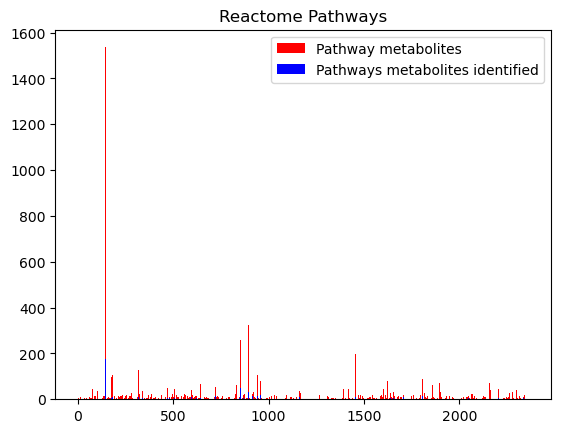

In [16]:
plt.bar(np.arange(len(counts)) - 0.1, counts, width=1, label='Pathway metabolites', color='red')
plt.bar(np.arange(len(counts)) - 0.1, match_counts, width=1, label='Pathways metabolites identified', color='blue')
plt.legend()  # Show legend to identify the lists
plt.title('Reactome Pathways')

In [17]:
coverage

0
R-HSA-1059683    0.0000
R-HSA-109581     0.0000
R-HSA-109582     0.0375
R-HSA-109606     0.0000
R-HSA-109703     0.0000
                  ...  
R-HSA-9861718    0.1000
R-HSA-9864848    0.0000
R-HSA-9865881    0.0000
R-HSA-991365     0.0000
R-HSA-997272     0.0000
Length: 2364, dtype: float64

In [18]:
for node in G.nodes:
    if node in coverage.index:
        G.nodes[node]['coverage'] = coverage[node]
    else:
        G.nodes[node]['coverage'] = 0  

In [19]:
nx.write_graphml(G, '/home/scostagonza/Documents/Pathway_hierarchy.graphml')

In [20]:
match_counts_lpa = df.apply(lambda row: row.isin(chebi_identified_lpa).sum(), axis=1)
count_greater_than_zero_lpa = lambda row: (row > 0).sum()
counts_lpa = df.apply(count_greater_than_zero_lpa, axis=1)
coverage_lpa = match_counts_lpa / counts_lpa

In [21]:
for node in G.nodes:
    if node in coverage.index:
        G.nodes[node]['coverage'] = coverage_lpa[node]
    else:
        G.nodes[node]['coverage'] = 0  

In [22]:
nx.write_graphml(G, '/home/scostagonza/Documents/Pathway_hierarchy_lpa.graphml')

In [23]:
df = pd.read_csv('Pathway_coverage.csv')
#df['coverage'] = df['#Entities found']/df['#Entities total']
#df.coveraged

In [24]:
df.columns

Index(['Pathway identifier', 'Pathway name', '#Entities found',
       '#Entities total', 'Entities ratio', 'Entities pValue', 'Entities FDR',
       '#Reactions found', '#Reactions total', 'Reactions ratio',
       'Species identifier', 'Species name', 'Submitted entities found',
       'Mapped entities', 'Found reaction identifiers'],
      dtype='object')

In [25]:
# entities_mapping = dict(zip(df['Pathway identifier'], df.coverage))

# for node in G.nodes:
#     if node in entities_mapping:
#         G.nodes[node]['coverage'] = entities_mapping[node]
#     else:
#         G.nodes[node]['coverage'] = 0  

In [26]:
pa_lpa_table = pd.read_csv('Pathway_hierarchy_lpa.graphml default node.csv')

In [27]:
pa_lpa_table[pa_lpa_table.RootName == 'Metabolism'].columns

Index(['color', 'coverage', 'label', 'name', 'Root', 'RootCol', 'RootName',
       'selected', 'shared name'],
      dtype='object')

In [28]:
relevant_path = pa_lpa_table.sort_values('coverage',ascending=False)

In [29]:
relevant_path.head(15)

,color,coverage,label,name,Root,RootCol,RootName,selected,shared name
1644,#34b331,1.000000,Defective SLC22A12 causes renal hypouricemia 1...,Defective SLC22A12 causes renal hypouricemia 1...,R-HSA-1643685,#34b331,Disease,False,Defective SLC22A12 causes renal hypouricemia 1...
2603,#34b331,1.000000,Defective ADA disrupts (deoxy)adenosine deamin...,Defective ADA disrupts (deoxy)adenosine deamin...,R-HSA-1643685,#34b331,Disease,False,Defective ADA disrupts (deoxy)adenosine deamin...
2601,#34b331,1.000000,Defective APRT disrupts adenine salvage,Defective APRT disrupts adenine salvage,R-HSA-1643685,#34b331,Disease,False,Defective APRT disrupts adenine salvage
1688,#f55fe7,1.000000,Trafficking of myristoylated proteins to the c...,Trafficking of myristoylated proteins to the c...,R-HSA-1852241,#f55fe7,Organelle biogenesis and maintenance,False,Trafficking of myristoylated proteins to the c...
1159,#c77df4,1.000000,Muscarinic acetylcholine receptors,Muscarinic acetylcholine receptors,R-HSA-162582,#c77df4,Signal Transduction,False,Muscarinic acetylcholine receptors
2368,#35ad9f,1.000000,FOXO-mediated transcription of oxidative stres...,FOXO-mediated transcription of oxidative stres...,R-HSA-74160,#35ad9f,Gene expression (Transcription),False,FOXO-mediated transcription of oxidative stres...
2126,#c77df4,1.000000,PTK6 Expression,PTK6 Expression,R-HSA-162582,#c77df4,Signal Transduction,False,PTK6 Expression
1639,#34b331,1.000000,Defective SLC29A3 causes histiocytosis-lymphad...,Defective SLC29A3 causes histiocytosis-lymphad...,R-HSA-1643685,#34b331,Disease,False,Defective SLC29A3 causes histiocytosis-lymphad...
1549,#34b331,1.000000,Defective CYP26B1 causes RHFCA,Defective CYP26B1 causes RHFCA,R-HSA-1643685,#34b331,Disease,False,Defective CYP26B1 causes RHFCA
2605,#34b331,0.750000,Nucleotide catabolism defects,Nucleotide catabolism defects,R-HSA-1643685,#34b331,Disease,False,Nucleotide catabolism defects


In [30]:
pa_table = pd.read_csv('Pathway_hierarchy.graphml default node.csv')

In [31]:
relevant_path = pa_table.sort_values('coverage',ascending=False)

In [32]:
relevant_path.head(15)

,color,coverage,label,name,Root,RootCol,RootName,selected,shared name
1639,#34b331,1.000000,Defective SLC29A3 causes histiocytosis-lymphad...,Defective SLC29A3 causes histiocytosis-lymphad...,R-HSA-1643685,#34b331,Disease,False,Defective SLC29A3 causes histiocytosis-lymphad...
1549,#34b331,1.000000,Defective CYP26B1 causes RHFCA,Defective CYP26B1 causes RHFCA,R-HSA-1643685,#34b331,Disease,False,Defective CYP26B1 causes RHFCA
2457,#34b331,1.000000,Defective gamma-carboxylation of F9,Defective gamma-carboxylation of F9,R-HSA-1643685,#34b331,Disease,False,Defective gamma-carboxylation of F9
1688,#f55fe7,1.000000,Trafficking of myristoylated proteins to the c...,Trafficking of myristoylated proteins to the c...,R-HSA-1852241,#f55fe7,Organelle biogenesis and maintenance,False,Trafficking of myristoylated proteins to the c...
2603,#34b331,1.000000,Defective ADA disrupts (deoxy)adenosine deamin...,Defective ADA disrupts (deoxy)adenosine deamin...,R-HSA-1643685,#34b331,Disease,False,Defective ADA disrupts (deoxy)adenosine deamin...
2601,#34b331,1.000000,Defective APRT disrupts adenine salvage,Defective APRT disrupts adenine salvage,R-HSA-1643685,#34b331,Disease,False,Defective APRT disrupts adenine salvage
2368,#35ad9f,1.000000,FOXO-mediated transcription of oxidative stres...,FOXO-mediated transcription of oxidative stres...,R-HSA-74160,#35ad9f,Gene expression (Transcription),False,FOXO-mediated transcription of oxidative stres...
1159,#c77df4,1.000000,Muscarinic acetylcholine receptors,Muscarinic acetylcholine receptors,R-HSA-162582,#c77df4,Signal Transduction,False,Muscarinic acetylcholine receptors
1644,#34b331,1.000000,Defective SLC22A12 causes renal hypouricemia 1...,Defective SLC22A12 causes renal hypouricemia 1...,R-HSA-1643685,#34b331,Disease,False,Defective SLC22A12 causes renal hypouricemia 1...
1607,#34b331,1.000000,Defective ABCA1 causes TGD,Defective ABCA1 causes TGD,R-HSA-1643685,#34b331,Disease,False,Defective ABCA1 causes TGD


In [33]:
difference = np.sort(pa_lpa_table.coverage - pa_table.coverage)
clen_difference = difference[~np.isnan(difference)]
clen_difference = clen_difference[clen_difference != 0]

In [72]:
pa_table[pa_lpa_table.coverage - pa_table.coverage == -0.5]

,color,coverage,label,name,Root,RootCol,RootName,selected,shared name
558,#37abb4,0.5,Advanced glycosylation endproduct receptor sig...,Advanced glycosylation endproduct receptor sig...,R-HSA-168256,#37abb4,Immune System,False,Advanced glycosylation endproduct receptor sig...
1506,#34b331,0.5,Hh mutants abrogate ligand secretion,Hh mutants abrogate ligand secretion,R-HSA-1643685,#34b331,Disease,False,Hh mutants abrogate ligand secretion
1507,#34b331,0.5,Hh mutants are degraded by ERAD,Hh mutants are degraded by ERAD,R-HSA-1643685,#34b331,Disease,False,Hh mutants are degraded by ERAD
1552,#34b331,0.5,Defective FMO3 causes TMAU,Defective FMO3 causes TMAU,R-HSA-1643685,#34b331,Disease,False,Defective FMO3 causes TMAU
1558,#34b331,0.5,Defective CYP27B1 causes VDDR1B,Defective CYP27B1 causes VDDR1B,R-HSA-1643685,#34b331,Disease,False,Defective CYP27B1 causes VDDR1B
1605,#34b331,0.5,Defective ABCG8 causes GBD4 and sitosterolemia,Defective ABCG8 causes GBD4 and sitosterolemia,R-HSA-1643685,#34b331,Disease,False,Defective ABCG8 causes GBD4 and sitosterolemia
1606,#34b331,0.5,Defective ABCG5 causes sitosterolemia,Defective ABCG5 causes sitosterolemia,R-HSA-1643685,#34b331,Disease,False,Defective ABCG5 causes sitosterolemia
1814,#35ae92,0.5,RAB geranylgeranylation,RAB geranylgeranylation,R-HSA-392499,#35ae92,Metabolism of proteins,False,RAB geranylgeranylation
2404,#34b331,0.5,Defects of contact activation system (CAS) and...,Defects of contact activation system (CAS) and...,R-HSA-1643685,#34b331,Disease,False,Defects of contact activation system (CAS) and...
2408,#34b331,0.5,Defective factor IX causes hemophilia B,Defective factor IX causes hemophilia B,R-HSA-1643685,#34b331,Disease,False,Defective factor IX causes hemophilia B


<BarContainer object of 286 artists>

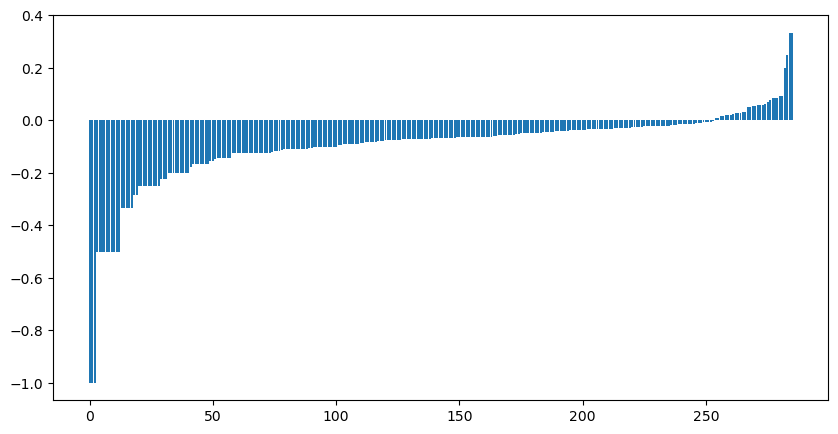

In [34]:
plt.figure(figsize=(10,5))
plt.bar(range(len(clen_difference)),clen_difference)

In [35]:
pa_lpa_table.coverage[~np.isnan(pa_lpa_table.coverage)].sum()

90.19080722032653

In [36]:
pa_lpa_table.coverage[~np.isnan(pa_lpa_table.coverage)].mean()

0.04357043827068915

In [37]:
pa_table.coverage[~np.isnan(pa_table.coverage)].sum()

117.87526787335881

In [38]:
pa_table.coverage[~np.isnan(pa_table.coverage)].mean()

0.05694457385186416

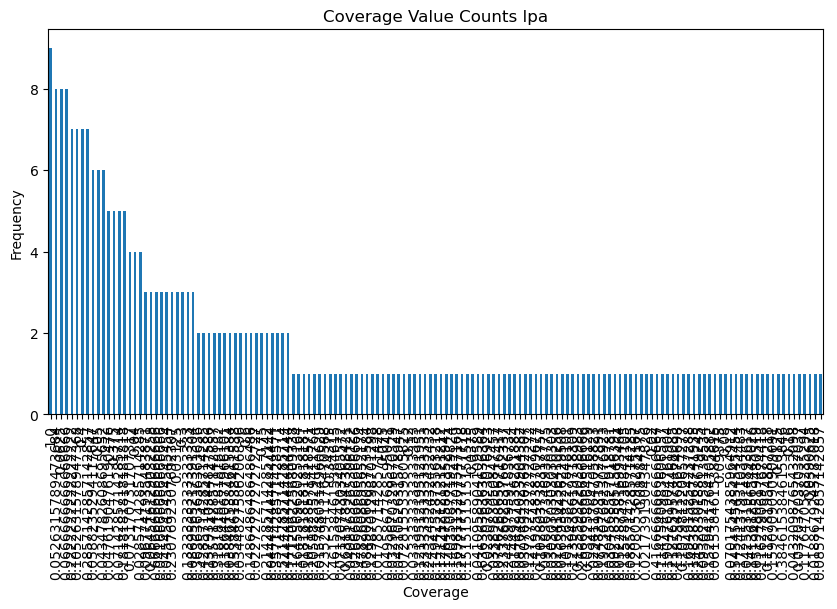

In [39]:
pa_lpa_table.coverage.value_counts().loc[1:].plot(kind='bar', figsize=(10, 5))
plt.xlabel('Coverage')
plt.ylabel('Frequency')
plt.title('Coverage Value Counts lpa')
plt.show()

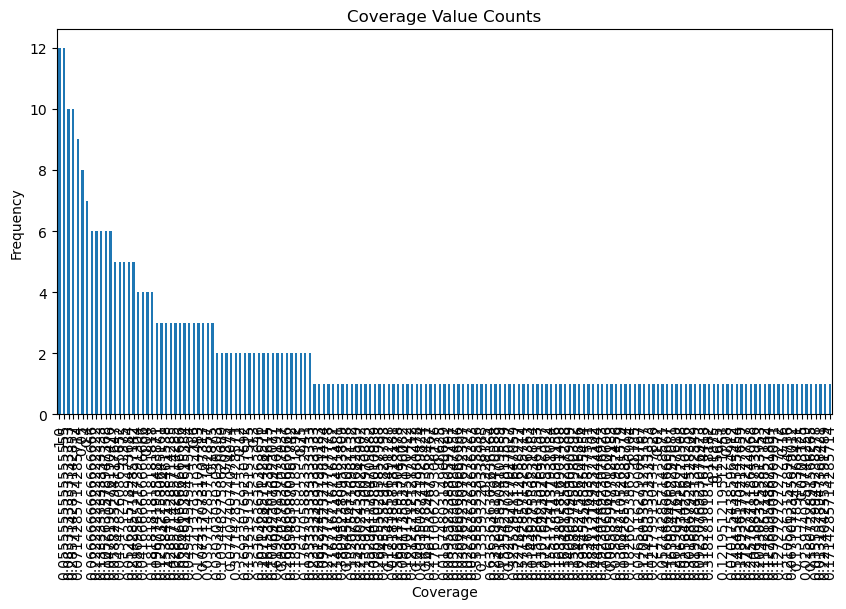

In [40]:
pa_table.coverage.value_counts().loc[1:].plot(kind='bar', figsize=(10, 5))
plt.xlabel('Coverage')
plt.ylabel('Frequency')
plt.title('Coverage Value Counts')A
plt.show()

In [41]:
mask = pa_table[pa_table.RootName == 'Metabolism'].Root
met_counts = counts[mask]
met_match_counts = match_counts[mask]

In [42]:
mask.shape

(334,)

Text(0.5, 1.0, 'Reactome Pathways')

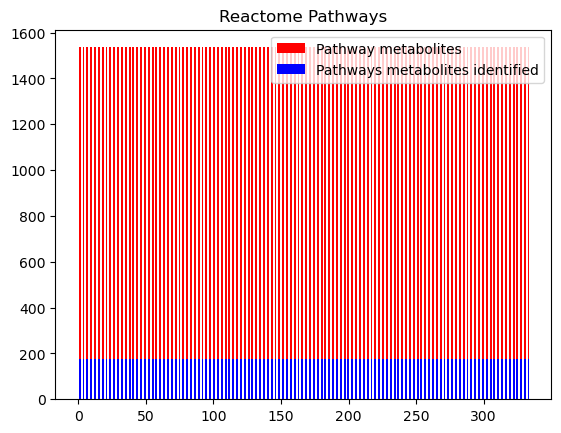

In [43]:
plt.bar(np.arange(len(met_counts)) - 0.0, met_counts, width=0.5, label='Pathway metabolites', color='red')
plt.bar(np.arange(len(met_match_counts)) - 0.0, met_match_counts, width=0.5, label='Pathways metabolites identified', color='blue')
plt.legend()  # Show legend to identify the lists
plt.title('Reactome Pathways')

In [44]:
mask = pa_table[pa_table.RootName == 'Disease'].Root
met_counts = counts[mask]
met_match_counts = match_counts[mask]

Text(0.5, 1.0, 'Reactome Pathways')

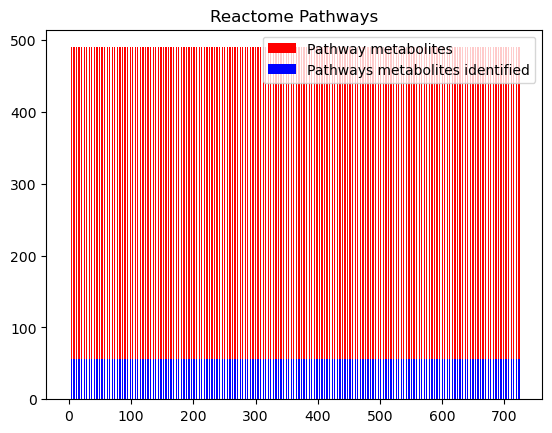

In [45]:
plt.bar(np.arange(len(met_counts)) - 0.0, met_counts, width=0.5, label='Pathway metabolites', color='red')
plt.bar(np.arange(len(met_match_counts)) - 0.0, met_match_counts, width=0.5, label='Pathways metabolites identified', color='blue')
plt.legend()  # Show legend to identify the lists
plt.title('Reactome Pathways')

In [46]:
disease_rows = pa_table[pa_table.RootName == 'Metabolism']

# Step 2: Remove NaN values from the coverage column
disease_rows_non_nan = disease_rows[~np.isnan(disease_rows.coverage)]

# Step 3: Filter for coverage values greater than 0
mask = disease_rows_non_nan.coverage > 0

# Apply the mask to get the filtered DataFrame
filtered_pa_table = disease_rows_non_nan[mask]

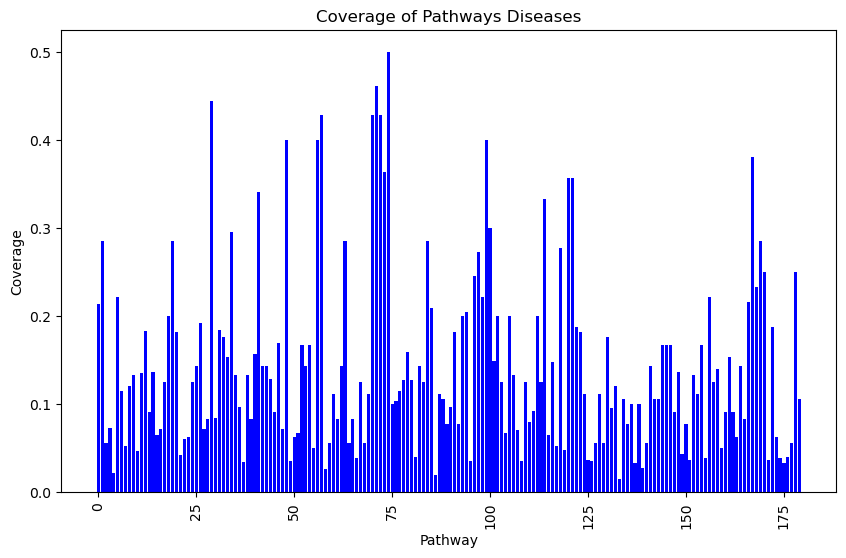

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0,filtered_pa_table.label.shape[0]), filtered_pa_table.coverage, color='blue')
plt.xlabel('Pathway')
plt.ylabel('Coverage')
plt.title('Coverage of Pathways Diseases')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.savefig('coverage_disease_pathways.png')
plt.show()

In [49]:
disease_rows = pa_lpa_table[pa_lpa_table.RootName == 'Metabolism']

# Step 2: Remove NaN values from the coverage column
disease_rows_non_nan = disease_rows[~np.isnan(disease_rows.coverage)]

# Step 3: Filter for coverage values greater than 0
mask = disease_rows_non_nan.coverage > 0

# Apply the mask to get the filtered DataFrame
filtered_pa_lpa_table = disease_rows_non_nan[mask]

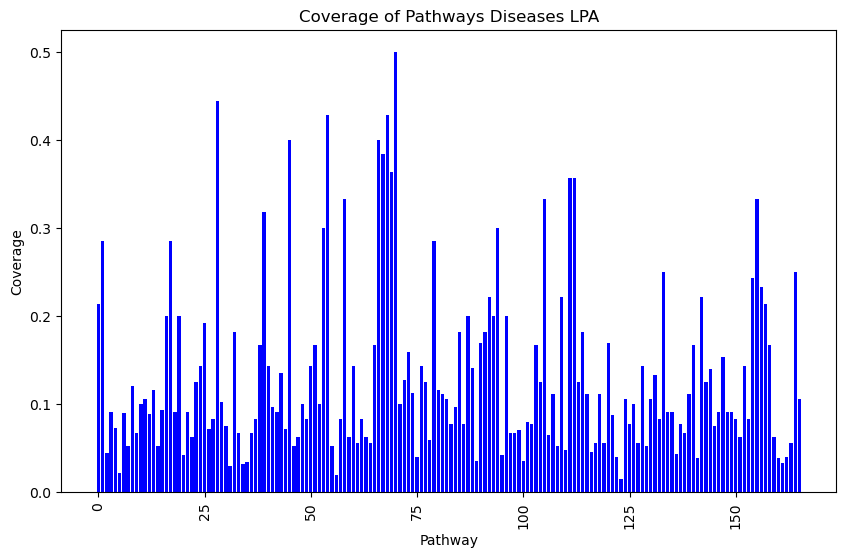

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(np.arange(0,filtered_pa_lpa_table.coverage.shape[0]), filtered_pa_lpa_table.coverage, color='blue')
plt.xlabel('Pathway')
plt.ylabel('Coverage')
plt.title('Coverage of Pathways Diseases LPA')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.savefig('Coverage of Pathways Diseases LPA.png')
plt.show()

In [52]:
def overlap_coefficient(list1, list2):

    # Szymkiewicz–Simpson coefficient

    intersection = len(list(set(list1).intersection(list(set(list2)))))

    smaller_set = min(len(list1), len(list2))

    return float(intersection) / smaller_set

Pathway Enrichment